# Análisis de corte de energía
***
El propósito de este notebook es explorar los datos de cortes de energía. En este Notebook se realizarán las siguientes tareas:
- Acceder a los datos
- Crear gráfico
- Realizar análisis
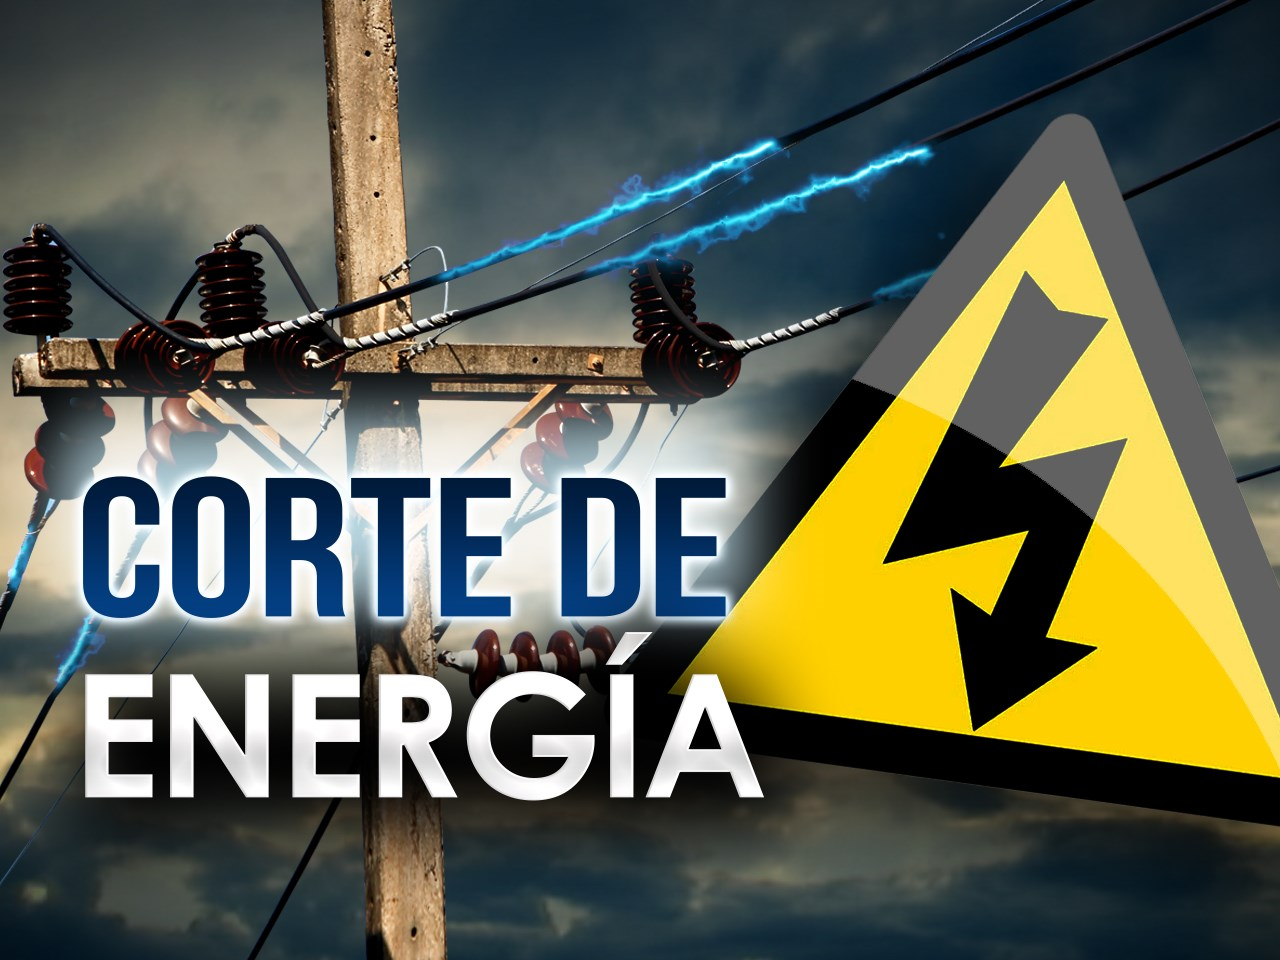

In [1]:
import arcpy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import arcgis

## Datos de acceso


In [2]:
cortes = r'C:\Student\PYTS\Datos\Cortes.gdb\TotalCortes'
df = pd.DataFrame.spatial.from_featureclass(cortes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    394 non-null    int64   
 1   Origen      394 non-null    object  
 2   Residentes  394 non-null    int64   
 3   SHAPE       394 non-null    geometry
dtypes: geometry(1), int64(2), object(1)
memory usage: 12.4+ KB


In [3]:
cortes_df = df[['Origen','Residentes']]
cortes_df.head()

,Origen,Residentes
0,Teléfono,2
1,Teléfono,8
2,Teléfono,8
3,Teléfono,2
4,Teléfono,8


In [4]:
cortes_df.groupby('Origen').agg({'Origen':'count'})

,Origen
Origen,
App,216
Redes Sociales,135
Teléfono,43


In [5]:
origen = df['Origen'].value_counts()  

In [6]:
%matplotlib inline

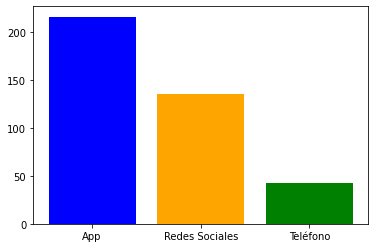

In [7]:
plt.bar(origen.index, origen, color=['blue', 'orange', 'green'])
plt.show()

In [8]:
cortes_densidad = arcpy.sa.KernelDensity(cortes, "Residentes", 10, None, "SQUARE_KILOMETERS")
cortes_densidad.save(r"C:\Student\PYTS\Default.gdb\DensidadCortesPorResidentes")  